## GRUPO 8 

#### *Integrantes:* 

1. Gianfranco Soria (20163509)
3. Andrea Clavo (20176040)
4. Sandra Martínez (20173026)

_____
## Question 1: Orthogonal Learning
_____

1. Replicate Simulation Design 1 three times using different numbers of trials. So you have to use:

- The equation of Y for the three cases now is: Y = 5*D + beta*X + rnorm(n)
- B = 50 , B = 100, B = 1000.
- Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?
- Why does this happen? Give an econometric explanation of this.
- Label your axes and legends correctly your figures.

# Simulation Design 1

### B=50

In [1]:
library(hdm)

set.seed(1)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

Warning message:
"package 'hdm' was built under R version 3.6.3"

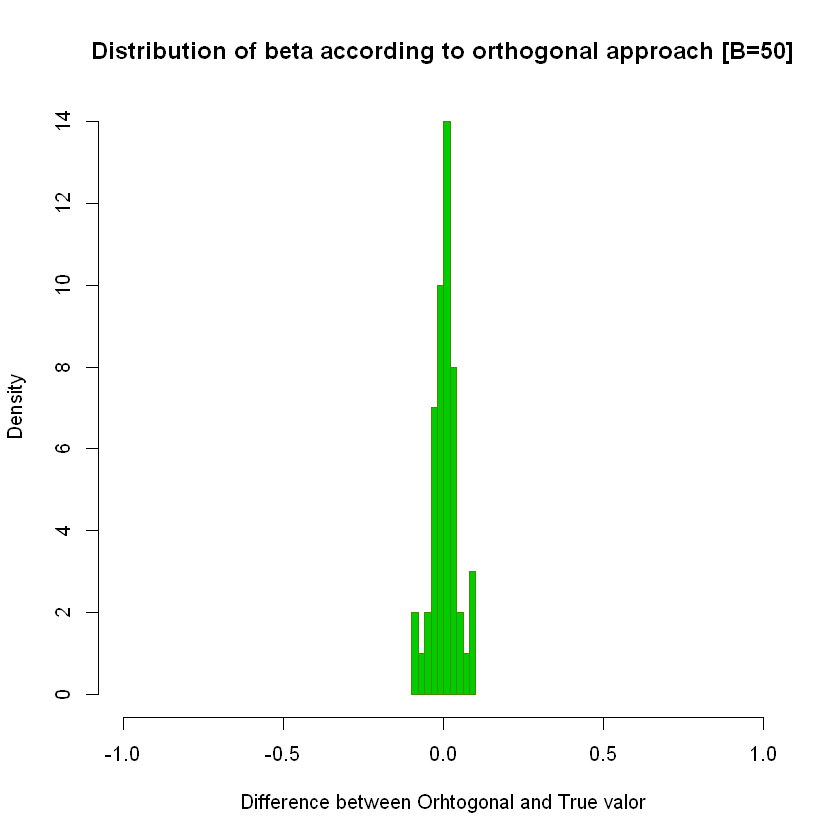

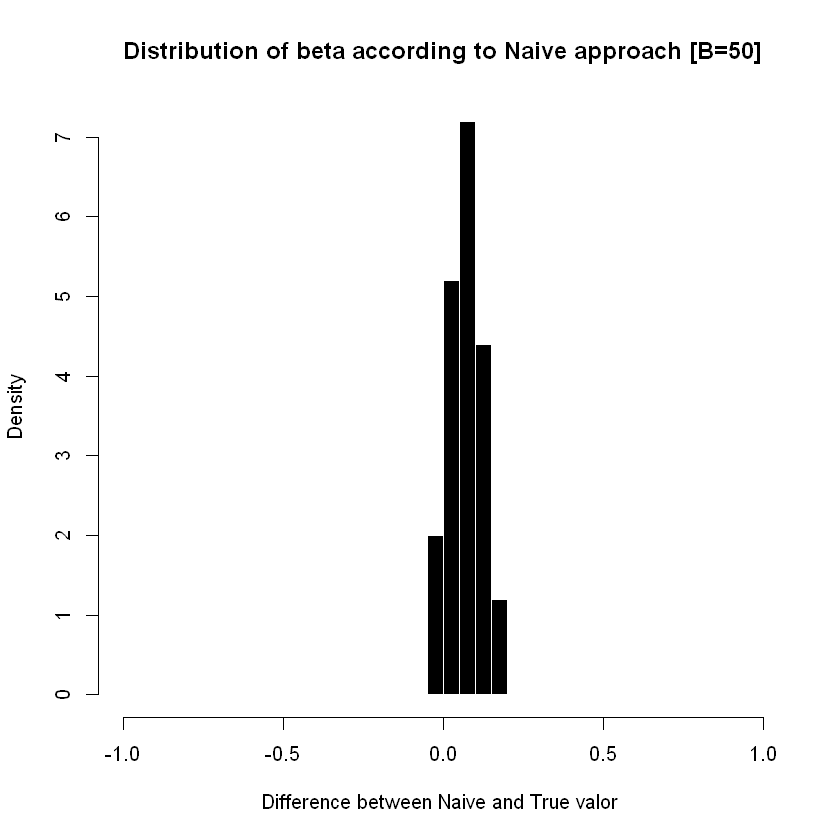

In [2]:
hist(Orthogonal-5,col=3, freq=F, xlim= c(-1, 1), xlab= "Difference between Orhtogonal and True valor", main="Distribution of beta according to orthogonal approach [B=50]", border="chartreuse4")
hist(Naive-5, col=1, freq=F, xlim= c(-1,1), xlab= "Difference between Naive and True valor ", main = "Distribution of beta according to Naive approach [B=50]", border="white")



### B=100

In [3]:
library(hdm)

set.seed(1)
B= 100 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


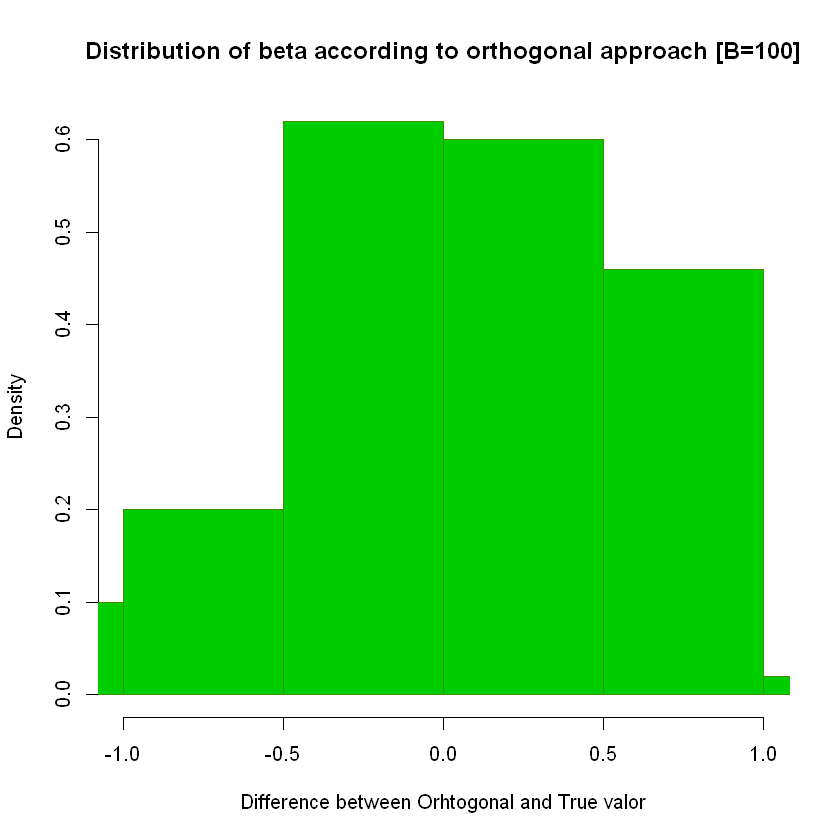

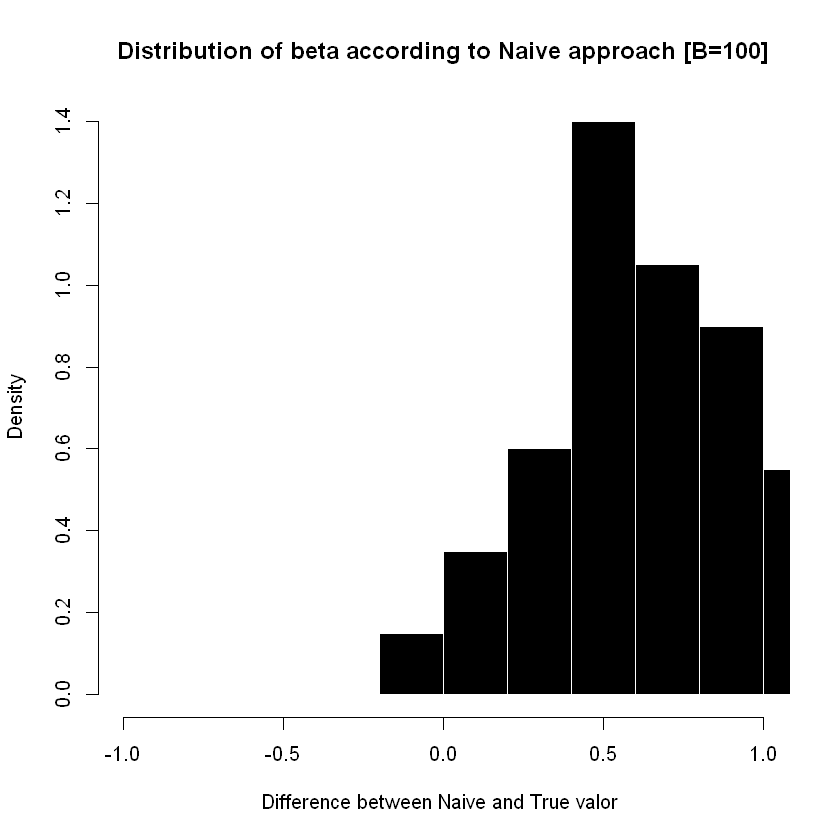

In [4]:
hist(Orthogonal-5,col=3, freq=F, xlim= c(-1, 1), xlab= "Difference between Orhtogonal and True valor", main="Distribution of beta according to orthogonal approach [B=100]", border="chartreuse4")
hist(Naive-5, col=1, freq=F, xlim= c(-1,1), xlab= "Difference between Naive and True valor ", main = "Distribution of beta according to Naive approach [B=100]", border="white")

### B=1000

In [6]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


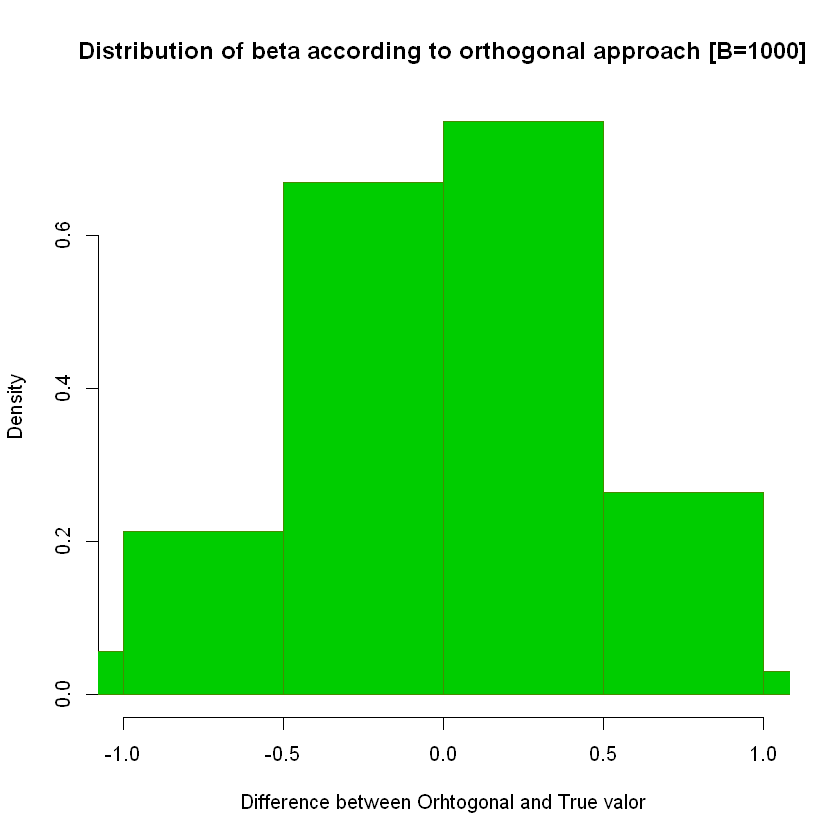

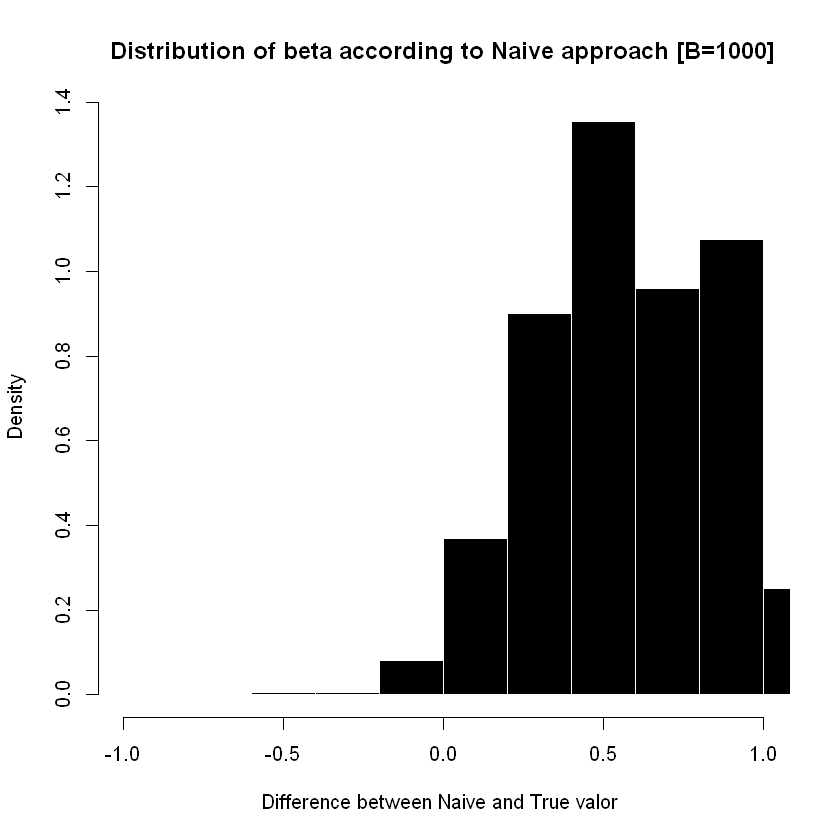

In [7]:
hist(Orthogonal-5,col=3, freq=F, xlim= c(-1, 1), xlab= "Difference between Orhtogonal and True valor", main="Distribution of beta according to orthogonal approach [B=1000]", border="chartreuse4")
hist(Naive-5, col=1, freq=F, xlim= c(-1,1), xlab= "Difference between Naive and True valor ", main = "Distribution of beta according to Naive approach [B=1000]", border="white")


- ### Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?

First, in a general way, it can be observed that the histograms as the number of attempts increases, the density decreases for both approaches. In the case of the Orthogonal approach, the distribution is more centered at 0 and resembles more a normal distribution with mean 0 (large numbers theorem) and for the Naive, it is more pulled towards 1. The reason for this is because after each experiment, the estimated beta, in the case of the orthogonal approach, is very close to the real value which is 5. That is, these values for the first graph (B=50) vary between 4.5 and 5.5 and for the other two graphs (B=100 and B=1000) vary approximately between 4 and 6. On the other hand, in the Naive approach, the distribution shows that the estimated beta values are more centered on 5.5 or 6.

Therefore, using the Naive approach since it is not taking into account Neyma's Orthogonality problem cannot make inference and the beta is even biased.

- ### Why does this happen? Give an econometric explanation of this.

Remember our main equation (Double Lasso): $Y=\alpha D+\beta'W+\epsilon$

where $D$ is the target regressor and $W$ consists of $p$ controls.
After partilling-out, 

$\hat{Y}=\alpha\tilde{D}+\epsilon,E\epsilon\tilde{D}=0$

where the cariables with tilde are residuald from taking out the linear
effect of $W$ 

$\tilde{D}=D-\gamma'_{DW},$ $\gamma'_{DW}=arg$ $\underset{\gamma\epsilon R^{P}}{min}$$E(D-\gamma'W){}^{2}$

$\tilde{Y}=Y-\gamma'_{YW}$, $\gamma'_{YW}=arg$ $\underset{\gamma\epsilon R^{P}}{min}$$E(Y-\gamma'W){}^{2}$

Neyman Orthogonality 

It states that the target parameter is parameterized in terms of nuisance
parameters in such away that small perturbations in terms of biased
estimation of these parameters will translate to a negligible effect
on estimating the target parameter.

- We have the nuisance projection parameteres:  $\eta^{0}=(\gamma'_{DW},\gamma'_{YW})'$

- The target parameter: $\alpha(\eta)$. That is, this alpha is not sensitive to gamma changes. 

- is first order insesitive to local perturbations of these parameters: 

$D=\partial_{n}\alpha(\eta^{0})=0$

The following assumption is made, the Orthogonality Principle, where
there is no correlation between the error and the explanatory variable
X.  

$M(\kappa,\eta)=E[(\tilde{Y}(\eta_{1})-\kappa\tilde{D}(\eta_{2}))\tilde{D}(\eta_{2})]=0$

where: $n:=(n'_{1},n'_{2})'=\eta^{0}:=(\gamma'_{DW},\gamma'_{YW})'$

In this case, we have defined that D is a function of the control
variables (W). Then, we have regressed with double lasso to clean
up our D, so that there is no correlation and the above assumption
is fulfilled. 

$\tilde{Y}(\eta_{1})=Y-\eta'_{1}W,$ $\tilde{D}(\eta_{2})=D-\eta'_{2}W$

$\tilde{Y}=Y-\gamma'_{YW},$$\tilde{D}=D-\gamma'_{DW}W$

$D=-\partial_{n}M(\alpha,\eta^{0})^{-1}\partial_{n}M(\alpha,\eta^{0})$

Partial derivatives: 

$\partial_{n_{1}}M(\alpha,\eta^{0})^{-1}=E(W\tilde{D})=0$

$\partial_{n_{2}}M(\alpha,\eta^{0})^{-1}=-E(\tilde{Y}W)+2E(\alpha\tilde{D}W)=0$


$\hat{M}(\kappa,\hat{n})=E_{n}[(\check{Y}-\kappa\check{Y})\check{D}]=0,$$\tilde{Y}=\tilde{Y}(\hat{\eta}_{1}),$$\tilde{D}=\tilde{D}(\hat{\eta}_{2})$

Neyman Orthogonality condition

$D=\partial_{n}\alpha(\eta^{0})=0,$$\partial_{n}M(\alpha,\eta^{0})=0$

Therefore, when assumption 1 is violated, the partial derivatives
will be different from 0 and the $\alpha$will move as the previously
estimated $\gamma$ changes. The estimator will be biased, so inference
will not be possible. 

NOTE: In the exercise performed for the histograms, our target variable
is the $\beta$. In contrast, in this demonstration it is the $\alpha$


#### [General terms] Overcoming Regularization Biases using Orthogonalization.

As a lead example, consider the following partially linear regression
(PLR)

$Y=D\theta'_{0}+g_{0}(X)+U$, $E[U\mid X,D]=0$

$D=m_{0}(X)+V$,$E[V\mid X]=0$

where $Y$is the outcome variable, $D$ is the policy/treatment variable of interest,vector $X=(X_{1},...,$$X_{p})$ consists of other controls, and $U$and $V$are disturbances. The first equation is the main equation, and $\theta_{0}$ is the main regression coefficient that we would like to infer. If $D$ is exogenous conditional on controls $X$, $\theta_{0}$has the interpretation of the treatment effect (TE) parameter or  "lift" parameter in business applications. The second equation keeps track of confounding, namely the dependence of the treatment variable on controls. This equation is not of interest per se but is important for characterizing and removing regularization bias. The confounding factors $X$ affect the policy variable $D$ via the function $m_{0}(X)$ and the outcome variable via the function $g_{0}(X)$. In many applications, the dimension $\rho$ of vector $X$is large relative to $N$. To capture the feature that p is not vanishingly small relative to the sample size, modern analyses then model $\rho$ as increasing To capture the feature that p is not vanishingly small relative to the sample size, modern analyses then model p as increasing $\eta_{0}=(m_{0},g_{0})$ to fail. 

Now consider a onstruction that employs an "orthogonalized" formulation obtained by directly partialling out the effect of $X$ from $D$ to obtain the orthogonalized regressor $V=D-m_{0}(X)$. Specifically, we obtain $V=\hat{D}-\hat{m}_{0}(X)$, where $\hat{m}_{0}$ is a Machine Learning estimator of $m_{0}$ obtained using the auxiliary sample of observations. We are now solving an auxiliary prediction problem to estimate the conditional mean of $D$ given $X$, so we are doing "double prediction" or  "double machine learning".

After partialling the effect of $X$ out from $D$ and obtaining a preliminary estimate of g0 from the auxiliary sample as before, we may formulate the following "debiased" machine learning estimator for $\theta_{0}$ using the main sample of observations:

$\check{\theta}_{0}=(\frac{1}{n}\underset{i\epsilon I}{\sum}\hat{V}_{i}D_{i})^{-1}\frac{1}{n}\underset{i\epsilon I}{\sum}\hat{V}_{i}(Y_{i}-\hat{g}_{0}(X_{i}))$

By approximately orthogonalizing $D$ with respect to $X$ and approximately removing the direct effect of confounding by subtracting an estimate of $g_{0},$$\theta_{0}$removes the effect of regularization bias that contaminates. The formulation of $\check{\theta}_{0}$also provides direct links to both the classical econometric literature, as the estimator can clearly be interpreted as a linear instrumental variable (IV) estimator, and to the more recent literature on debiased lasso in the context where $g_{0}$ is taken to be well approximated by a sparse linear combination of prespecified functions of $X$.

To illustrate the benefits of the auxiliary prediction step and estimating $\theta_{0}$with $\check{\theta}_{0}$, we sketch the properties of $\check{\theta}_{0}$ here. We can decompose the scaled estimation error of $\check{\theta}_{0}$ into three components:

$\sqrt{n}(\check{\theta}_{0}-\theta_{0})=a^{*}+b^{*}+c^{*}$

The leading term, $a^{*}$, will satisfy

$a^{*}=(EV^{2})^{-1}$$\frac{1}{\sqrt{n}}\underset{i\epsilon I}{\sum}V_{i}U_{i}\rightsquigarrow N(0,\varSigma)$

under mild conditions. The second term, $b^{*}$, captures the impact of regularization bias in estimating $g_{0}$and $m_{0}.$Specifically, we will have

$b^{*}=(EV^{2})^{-1}\frac{1}{\sqrt{n}}\underset{i\epsilon I}{\sum}(\hat{m}_{0}(X_{i})-m_{0}(X_{i}))(\hat{g}_{0}(X_{i}))-g_{0}(X_{i}))$, which now depends on the product of the estimation errors in $\hat{m}_{0}$ and $\hat{g}_{0}$. Because this term depends only on the product of the estimation errors, it can vanish under a broad range of data-generating processes. Indeed, this term is upper-bounded by $\sqrt{nn}^{-(\varphi_{m}+\varphi_{g})},$where $n^{-\varphi_{m}}$and $n^{-\varphi_{g}}$are respectively the rates of convergence of $\hat{m}_{0}$to $m_{0}$ and $\hat{g}_{0}$ to $g_{0}$; ; and this upper bound can clearly vanish even though both $m_{0}$ and $g_{0}$are estimated at relatively slow rates. Verifying that $\check{\theta}_{0}$ has good properties then requires that the remainder term, $c^{*}$, is sufficiently well-behaved. 




_____
## Question 2: Double Lasso - Testing the Convergence Hypothesis
_____

1. Explain what is the Double Lasso Approach in a markdown cell. Use equations for a better explanation.

Urminsky, Hansen and Chernozhukov, described a “double-lasso” approach
that can help researchers select variables for inclusion in analyses in a
principled manner that avoids inflated Type I errors.  The goal of their paper is to identify covariates for inclusion in two steps, finding those that predict the dependent variable and those that predict the independent variable. The second step is important, because exclusion of a covariate that is a modest predictor of the dependent variable but a strong predictor of the independent variable can create a substantial omitted variable bias. In experimental data, the second step also serves as a test of randomization. While we recommend using lasso regression, calibrated to avoid overfitting, in these variable selection steps, we also discuss similarly-performing alternative methods. The variables selected in either step are then included in the regression of interest. 

Without loss of generality, they focus on the case with a single focal independent variable of interest, $Xi$, and we want to know how it relates to dependent variable $Yi$. The focal variable $Xi$ could be either a measured variable or an experimental condition code. In addition, they have multiple potential covariates, $W_{i1}$ to $W_{iK}$. We could estimate a linear regression model, finding $\beta$s that minimize the sum of squared errors in the regression equation:


$$ Y_i=\beta_0+\beta_1Xi+\beta_2W_{i1}+…+\beta_{K+1}W_{iK}+\epsilon_i $$

A lasso regression instead finds $\beta$s that minimize the sum of squared errors in the regression equation with an additional penalty term:

$$ Min[\Sigma_i(Y_i-\beta_0+\beta_1Xi+\beta_2W_{i1}+...+\beta_{K+1}W_{iK}+\epsilon_i)^2 + \lambda\Sigma_{k}|\beta_{k}|]
 $$

The penalty term results in the lasso regression shrinking the estimated regression coefficients towards zero and potentially setting coefficients on some variables exactly to zero, both of which help reduce over-fitting. The lasso, by setting some coefficients to zero, also performs variable selection. These shrinkage properties allow Lasso regression to be used even when the number of observations is small relative to the number of predictors (e.g. discussion in James, Witten, Hastie, & Tibshirani, 2013).

However, directly using lasso regression can be problematic. Those lasso-estimated coefficients that are actually non-zero are typically  underestimated, and lasso may mistakenly exclude variables with non-zero coefficients, particularly variables with moderate effects. Each
of these phenomena generally causes significant regularization bias that adversely affects estimation and inference about $\beta_1$. The omission of covariates with moderate but non-zero coefficients is especially problematic and results in omitted variable bias when these covariates are relevant predictors of the focal variable. In order to overcome such biases, we recommend using the “double-lasso” variable selection procedure (Belloni, et al., 2014), which was explicitly designed to alleviate both sources of bias, as follows:

**Step 1**: Fit a lasso regression predicting the dependent variable, and keeping track of the variables with non-zero estimated coefficients: 

$$ Y_i=\alpha_0+\alpha_1W_{i1}+…+\alpha_{K}W_{iK}+\epsilon_i $$

**Step 2**: Fit a lasso regression predicting the focal independent variable, keeping track of the variables with non-zero estimated coefficients:


$$ Y_i=\delta_0+\delta_1W_{i1}+…+\delta_{K}W_{iK}+\epsilon_i $$

**Step 3**: Fit a linear regression of the dependent variable on the focal independent variable, including the covariates ($W_{ik}$) selected in either of the first two steps:

$$ Y_i=\beta_0+\beta_1 X_{i}+\Sigma_{k\in_A}\beta_{K+1}W_{iK}+\epsilon_i $$

In the equation, $A$ is the union of the variables estimated to have non-zero coefficients in Steps $1$ and $2$. This regression could also include a small set of additional covariates identified a priori as necessary. Interpret and report the coefficient estimates and significance tests on the focal variable(s) as the final results.

2. Replicate the results using the next approaches:
- OLS
- Double LASSO using cross Validation (GLMNET in R and Sklearn in Python )
- Double Lasso using theoretical Lambda (HDM package both in R and Python)
- Double Lasso using method="partialling out", this is a direct way to get results from the HDM package, check the Python script for an example, and also you have to read the documentation for more details.
- Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.

# Testing the Convergence Hypothesis

## Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.


The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [52]:
library(hdm)
library(xtable)

In [53]:
# Export data to read in python
GrowthData <- GrowthData
save(GrowthData, file = "C:/Users/PC-1/Documents/GitHub/ECO224/Labs/data/GrowthData.RData")

In [54]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

The following objects are masked from growth (pos = 6):

    bmp1l, ex1, fert1, fert65, freeop, freetar, gde1, gdpsh465,
    geerec1, geetot1, govsh41, govwb1, gpop1, gvxdxe41, h65, hf65,
    high65, highc65, highcf65, highcm65, highf65, highm65, hm65,
    human65, humanf65, humanm65, hyr65, hyrf65, hyrm65, im1, intercept,
    invsh41, lifee065, mort1, mort65, no65, nof65, nom65, Outcome, p65,
    pf65, pinstab1, pm65, pop1565, pop65, pop6565, s65, sec65, secc65,
    seccf65, seccm65, secf65, secm65, sf65, sm65, syr65, syrf65,
    syrm65, teapri65, teasec65, tot1, worker65, xr65



[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

We determine the dimension of our data set.

In [55]:
dim(growth)

[1] 90 63

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

## METHOD 1: OLS

In [56]:
reg.ols <- lm(Outcome~.-1,data=growth)
summary(reg.ols)


Call:
lm(formula = Outcome ~ . - 1, data = growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040338 -0.011298 -0.000863  0.011813  0.043247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
intercept  2.472e-01  7.845e-01   0.315  0.75506   
gdpsh465  -9.378e-03  2.989e-02  -0.314  0.75602   
bmp1l     -6.886e-02  3.253e-02  -2.117  0.04329 * 
freeop     8.007e-02  2.079e-01   0.385  0.70300   
freetar   -4.890e-01  4.182e-01  -1.169  0.25214   
h65       -2.362e+00  8.573e-01  -2.755  0.01019 * 
hm65       7.071e-01  5.231e-01   1.352  0.18729   
hf65       1.693e+00  5.032e-01   3.365  0.00223 **
p65        2.655e-01  1.643e-01   1.616  0.11727   
pm65       1.370e-01  1.512e-01   0.906  0.37284   
pf65      -3.313e-01  1.651e-01  -2.006  0.05458 . 
s65        3.908e-02  1.855e-01   0.211  0.83469   
sm65      -3.067e-02  1.168e-01  -0.263  0.79479   
sf65      -1.799e-01  1.181e-01  -1.523  0.13886   
fert65     6.881e-03  2.705e-02   0.254

We determine the regression coefficient $\beta_1$ of the target regressor *gdpsh465* ($D$), its 95% confidence interval and the standard error.

In [57]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [58]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab1<- xtable(table, digits = 3)
print(tab1,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 19:28:23 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>


<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the
speed of convergence, and does not allow us to answer the question
about the convergence hypothesis since the confidence interval includes zero.

In contrast, we can use the partialling-out approach based on lasso regression ("Double Lasso").

## Method 2 - Using GLMNET 

In [41]:
Y <- as.matrix(growth)[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- as.matrix(growth)[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [48]:
library(glmnet)
fit.lasso.cv  <- cv.glmnet(x=W,y=Y, family="gaussian", alpha=1)
yhat.lasso.cv <- predict(fit.lasso.cv,newx=W)
r.Y <- Y-yhat.lasso.cv # creates the "residual" output variable

fit.lasso.cv  <- cv.glmnet(x=W,y=D, family="gaussian", alpha=1)
yhat.lasso.cv <- predict(fit.lasso.cv,newx=W)
r.D <- Y-yhat.lasso.cv  # creates the "residual" target regressor

partial.lasso <- lm(r.Y ~ r.D)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]


In [50]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - GLMNET")
tab2<- xtable(table, digits = 3)
print(tab2,type="html") # set type="latex" for printing table in LaTeX
tab2

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 19:27:38 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> LASSO - GLMNET </td> <td align="right"> -0.004 </td> <td align="right"> 0.007 </td> <td align="right"> -0.019 </td> <td align="right"> 0.010 </td> </tr>
   </table>


,estimator,standard error,lower bound CI,upper bound CI
LASSO - GLMNET,-0.004328601,0.007237513,-0.01871164,0.01005443


## Method 3 - HDM

We can use the partialling-out approach based on lasso regression ("Double Lasso")

In [27]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [28]:
r.Y <- rlasso(x=W,y=Y)$res # creates the "residual" output variable
r.D <- rlasso(x=W,y=D)$res # creates the "residual" target regressor
partial.lasso <- lm(r.Y ~ r.D)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]

In [36]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - HDM")
tab3<- xtable(table, digits = 3)
print(tab3,type="html") # set type="latex" for printing table in LaTeX
tab3

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 19:20:56 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> LASSO - HDMPY </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


,estimator,standard error,lower bound CI,upper bound CI
LASSO - HDMPY,-0.04981147,0.01393636,-0.07750705,-0.02211588


## Method 4 - Partialling out from HDM

In [30]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [31]:
lasso_direct = rlassoEffect(x = W, y = Y, d = D, method = "partialling out")
names(lasso_direct)

[1] "alpha"            "se"               "t"                "pval"            
 [5] "coefficients"     "coefficient"      "coefficients.reg" "selection.index" 
 [9] "residuals"        "call"             "samplesize"

In [32]:
est_lasso = lasso_direct$coefficients
std_lasso = lasso_direct$se
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso

In [34]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - PARTIALLING OUT")
tab4<- xtable(table, digits = 3)
print(tab4,type="html") # set type="latex" for printing table in LaTeX
tab4

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 18:59:12 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> LASSO - PARTIALLING OUT </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


,estimator,standard error,lower bound CI,upper bound CI
LASSO - PARTIALLING OUT,-0.04981147,0.01393636,-0.07750705,-0.02211588


## Summary

Finally, let us have a look at the results.

In [73]:
Final=rbind(tab1,tab2,tab3,tab4)
Final

,estimator,standard error,lower bound CI,upper bound CI
OLS,-0.009377989,0.029887726,-0.07060022,0.05184424
LASSO - GLMNET,-0.004328601,0.007237513,-0.01871164,0.01005443
LASSO - HDMPY,-0.049811465,0.013936358,-0.07750705,-0.02211588
LASSO - PARTIALLING OUT,-0.049811465,0.013936358,-0.07750705,-0.02211588


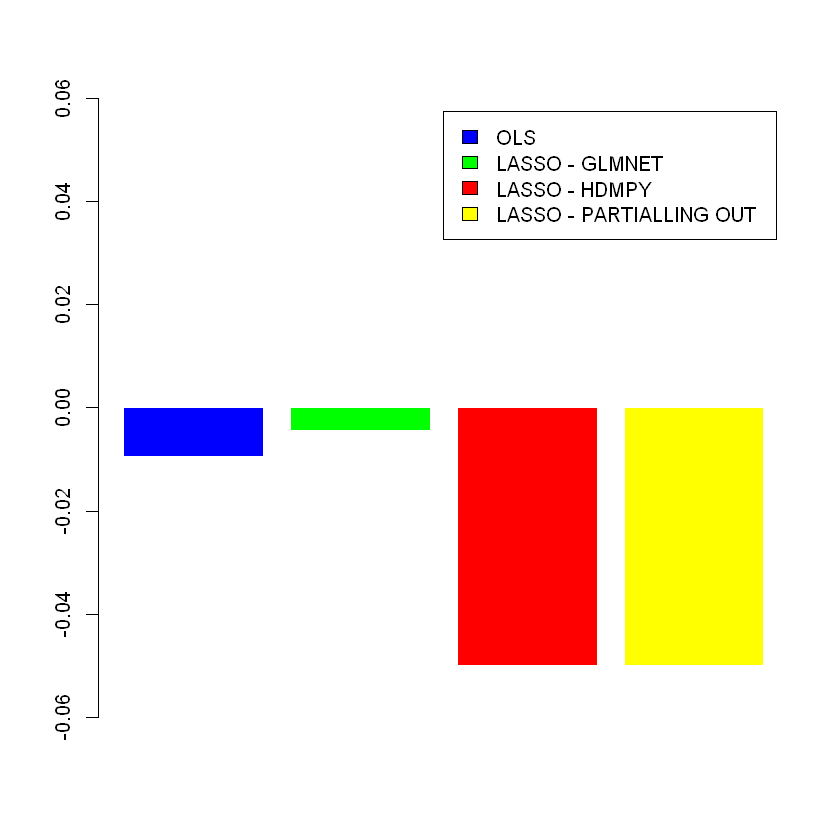

In [159]:

Base=data.frame(Metodo=c("OLS","LASSO - GLMNET","LASSO - HDMPY","LASSO - PARTIALLING OUT"), 
     Estimador=c(tab1$estimator,tab2$estimator,tab3$estimator,tab4$estimator))

barplot(Base$Estimador,col=c("blue","green","red","yellow"),ylim=c(-0.06,0.06),legend.text=Base$Metodo, border='white')